In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
files.upload()


Saving student-performance-factors.csv to student-performance-factors.csv


{'student-performance-factors.csv': b'Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score\r\n23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67\r\n19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61\r\n24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74\r\n29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71\r\n19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70\r\n19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71\r\n29,84,Medium,Low,Y

In [2]:
import pandas as pd

df = pd.read_csv("student-performance-factors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Dataset info
print(df.info())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert key columns to numeric
df['Hours_Studied'] = pd.to_numeric(df['Hours_Studied'], errors='coerce')
df['Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')

# Drop rows with missing study hours or score
df.dropna(subset=['Hours_Studied', 'Exam_Score'], inplace=True)

print("\nAfter cleaning:")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

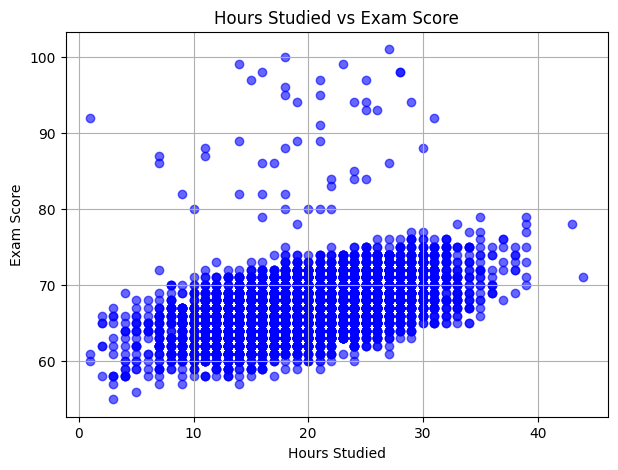


Correlation between Hours and Exam Score:
               Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445455
Exam_Score          0.445455    1.000000


In [7]:
plt.figure(figsize=(7,5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', alpha=0.6)
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

print("\nCorrelation between Hours and Exam Score:")
print(df[['Hours_Studied', 'Exam_Score']].corr())


In [8]:
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (5285, 1)
Testing size: (1322, 1)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)


Slope: 0.285668744443087
Intercept: 61.51116746904424


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 10.86
RMSE: 3.29
MAE: 2.45
R² Score: 0.23


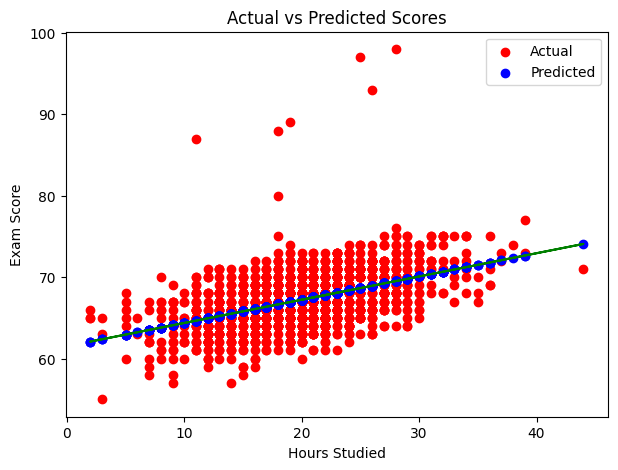

In [11]:
# Plot predictions
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.plot(X_test, y_pred, color='green')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))


Polynomial Regression R²: 0.23276034442853466
